Yuh i've studied this earlier fr, but now we gotta implent it on tensorflow

activation:

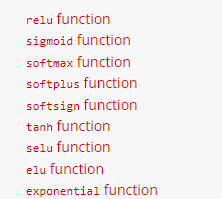

In [23]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random as rd
from sklearn.model_selection import train_test_split

In [2]:
#getting data (using fashion mnist)
fashion_mnist=keras.datasets.fashion_mnist.load_data()
(train_data, train_label), (test_data, test_label) = fashion_mnist      #splitting into 50|50? nah, how about 80|10

data=np.concatenate((train_data, test_data), axis=0)
label=np.concatenate((train_label, test_label), axis=0)

train_data, test_data, train_label, test_label = train_test_split(data, label, train_size=0.8, random_state=367126)
shapex= train_data[0].shape[0]
shapey=train_data[0].shape[1]
resolution=shapex*shapey
label_names=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

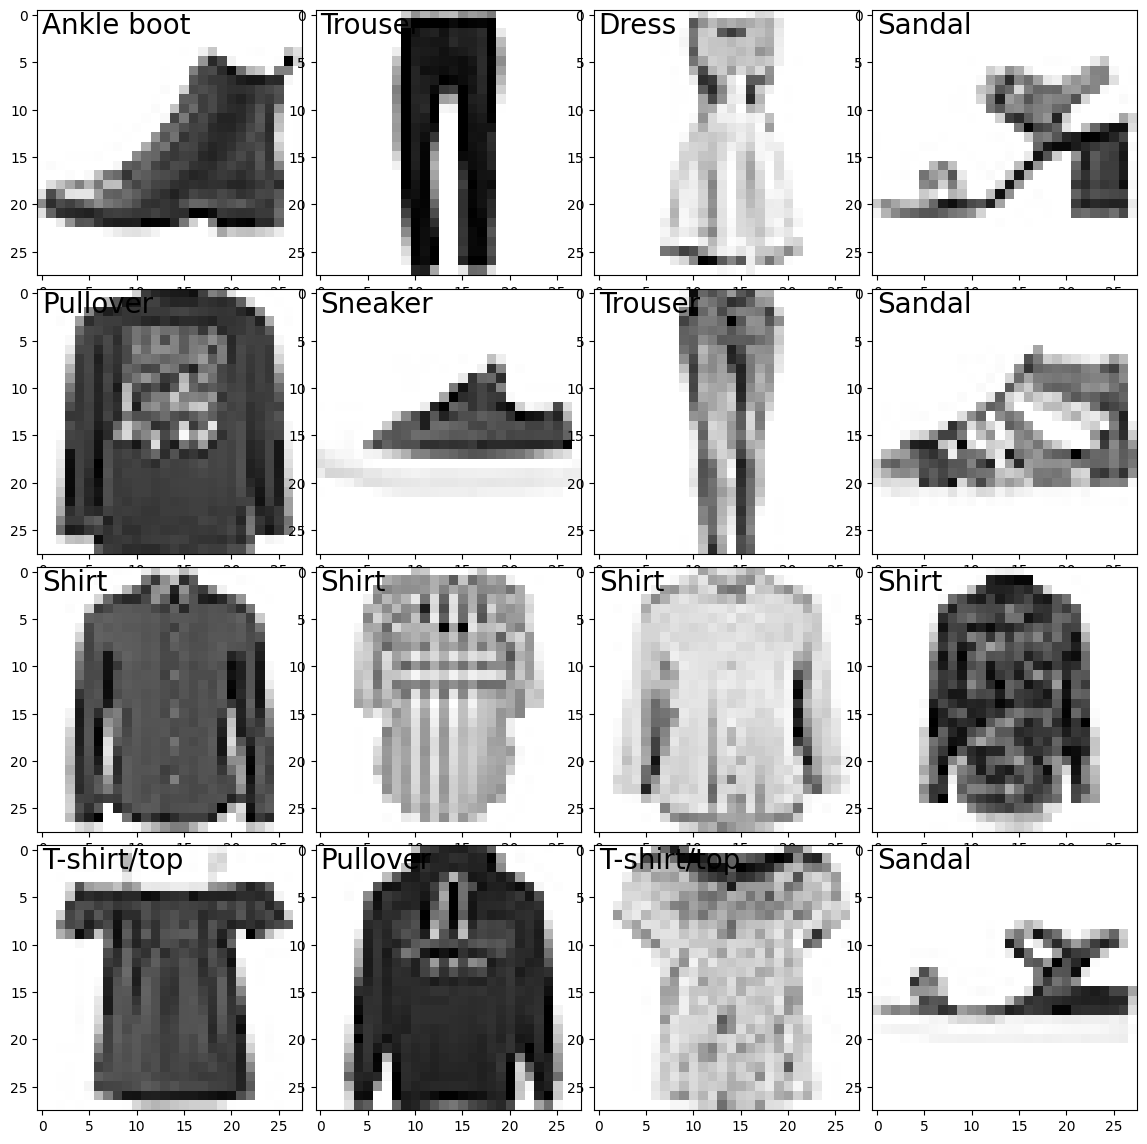

In [104]:
#show image
def show16imgs():
    fig = plt.figure(figsize=(11,11))
    fig.subplots_adjust(0, 0, 1, 1, 0.05, 0.05)
    for i in range(16):
        randint=rd.randint(0, len(train_data))
        ax = fig.add_subplot(4, 4, i+1)
        ax.imshow(train_data[randint], cmap="Greys")
        ax.text(0,2, str(label_names[train_label[randint]]), fontsize=20)
    plt.show()
    
show16imgs()

In [3]:
#preprocess data
train_data.max()                            #turning 0-255 into ->0-1
train_data=train_data/255;test_data=test_data/255

In [4]:
#model of neural network
ANN=keras.Sequential([keras.layers.Flatten(input_shape=train_data[0].shape),                #input (depends on the size of the data) [Total 785 from 28x28]
                     keras.layers.Dense(512, activation="relu"),                            # 1st hidden layer (can be random, the more layer the better)
                     keras.layers.Dense(256, activation="relu"),                            # 2nd hidden layer
                     keras.layers.Dense(np.unique(train_data).size, activation="softmax")]) #output (depends on the size of your total label)

ANN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [34]:
np.unique(train_data).size

256

In [5]:
#Fitting Model
ANN.fit(train_data, train_label, epochs=20)

Epoch 1/20
1750/1750 [==============================] - 16s 8ms/step - loss: 0.5027 - accuracy: 0.8225
Epoch 2/20
1750/1750 [==============================] - 16s 9ms/step - loss: 0.3652 - accuracy: 0.8650
Epoch 3/20
1750/1750 [==============================] - 12s 7ms/step - loss: 0.3253 - accuracy: 0.8797
Epoch 4/20
1750/1750 [==============================] - 11s 7ms/step - loss: 0.3033 - accuracy: 0.8872
Epoch 5/20
1750/1750 [==============================] - 13s 7ms/step - loss: 0.2859 - accuracy: 0.8929
Epoch 6/20
1750/1750 [==============================] - 14s 8ms/step - loss: 0.2664 - accuracy: 0.8995
Epoch 7/20
1750/1750 [==============================] - 15s 9ms/step - loss: 0.2559 - accuracy: 0.9039
Epoch 8/20
1750/1750 [==============================] - 17s 9ms/step - loss: 0.2420 - accuracy: 0.9095
Epoch 9/20
1750/1750 [==============================] - 23s 13ms/step - loss: 0.2312 - accuracy: 0.9115
Epoch 10/20
1750/1750 [==============================] - 16s 9ms/step - 

In [6]:
ANN.evaluate(test_data, test_label)             #evaluation

438/438 [==============================] - 2s 3ms/step - loss: 0.3814 - accuracy: 0.8941


[0.3814455568790436, 0.8941428661346436]

In [7]:
#PREDICTION
Predicted=ANN.predict(test_data)

438/438 [==============================] - 1s 3ms/step


In [32]:
for i in range(20):
    test=rd.randint(0, len(test_data))
    print(f' {Predicted[test]}  |   {label_names[int(test_label[test])]}')

 [1.18055008e-01 2.52495265e-05 8.09128047e-04 6.15905523e-02
 3.68240493e-04 3.05051842e-08 8.19151223e-01 1.32736755e-09
 5.87395562e-07 6.94633542e-08 2.83749939e-13 1.68626574e-13
 2.99641388e-13 3.24780919e-13 2.20289878e-13 2.76973404e-13
 2.05776951e-13 1.13116852e-13 1.89161390e-13 1.24184097e-13
 1.58776028e-13 2.00021125e-13 3.75005284e-13 4.09851108e-13
 4.37762944e-13 2.83462164e-13 2.82048094e-13 2.40184717e-13
 4.17604807e-13 2.01564907e-13 4.36349118e-13 1.80042450e-13
 2.43899600e-13 1.66037919e-13 2.42268960e-13 3.17268266e-13
 2.47734803e-13 4.49630513e-13 2.19904918e-13 1.94273552e-13
 3.77545136e-13 2.01930486e-13 1.73565386e-13 1.94322843e-13
 5.12007645e-13 4.12485367e-13 1.40321267e-13 2.57992846e-13
 1.27236248e-13 1.58361077e-13 2.02511334e-13 1.34149582e-13
 2.53995962e-13 4.32105361e-13 1.71934082e-13 2.42588474e-13
 1.93647222e-13 1.67554799e-13 1.09591874e-13 2.94065580e-13
 2.51409137e-13 2.32142322e-13 1.74128425e-13 1.94740613e-13
 1.94569838e-13 2.61376

In [8]:
#Saving model
ANN.save("FitModel/mnistfashion.h5")

C:\Users\Rhey\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#load Model
ANN= keras.models.load_model("FitModel/mnistfashion.h5")

In [22]:
for i in range(20):
    randomnum=rd.randint()
label_names[Predicted[1].argmax()]

'Ankle boot'

0.88


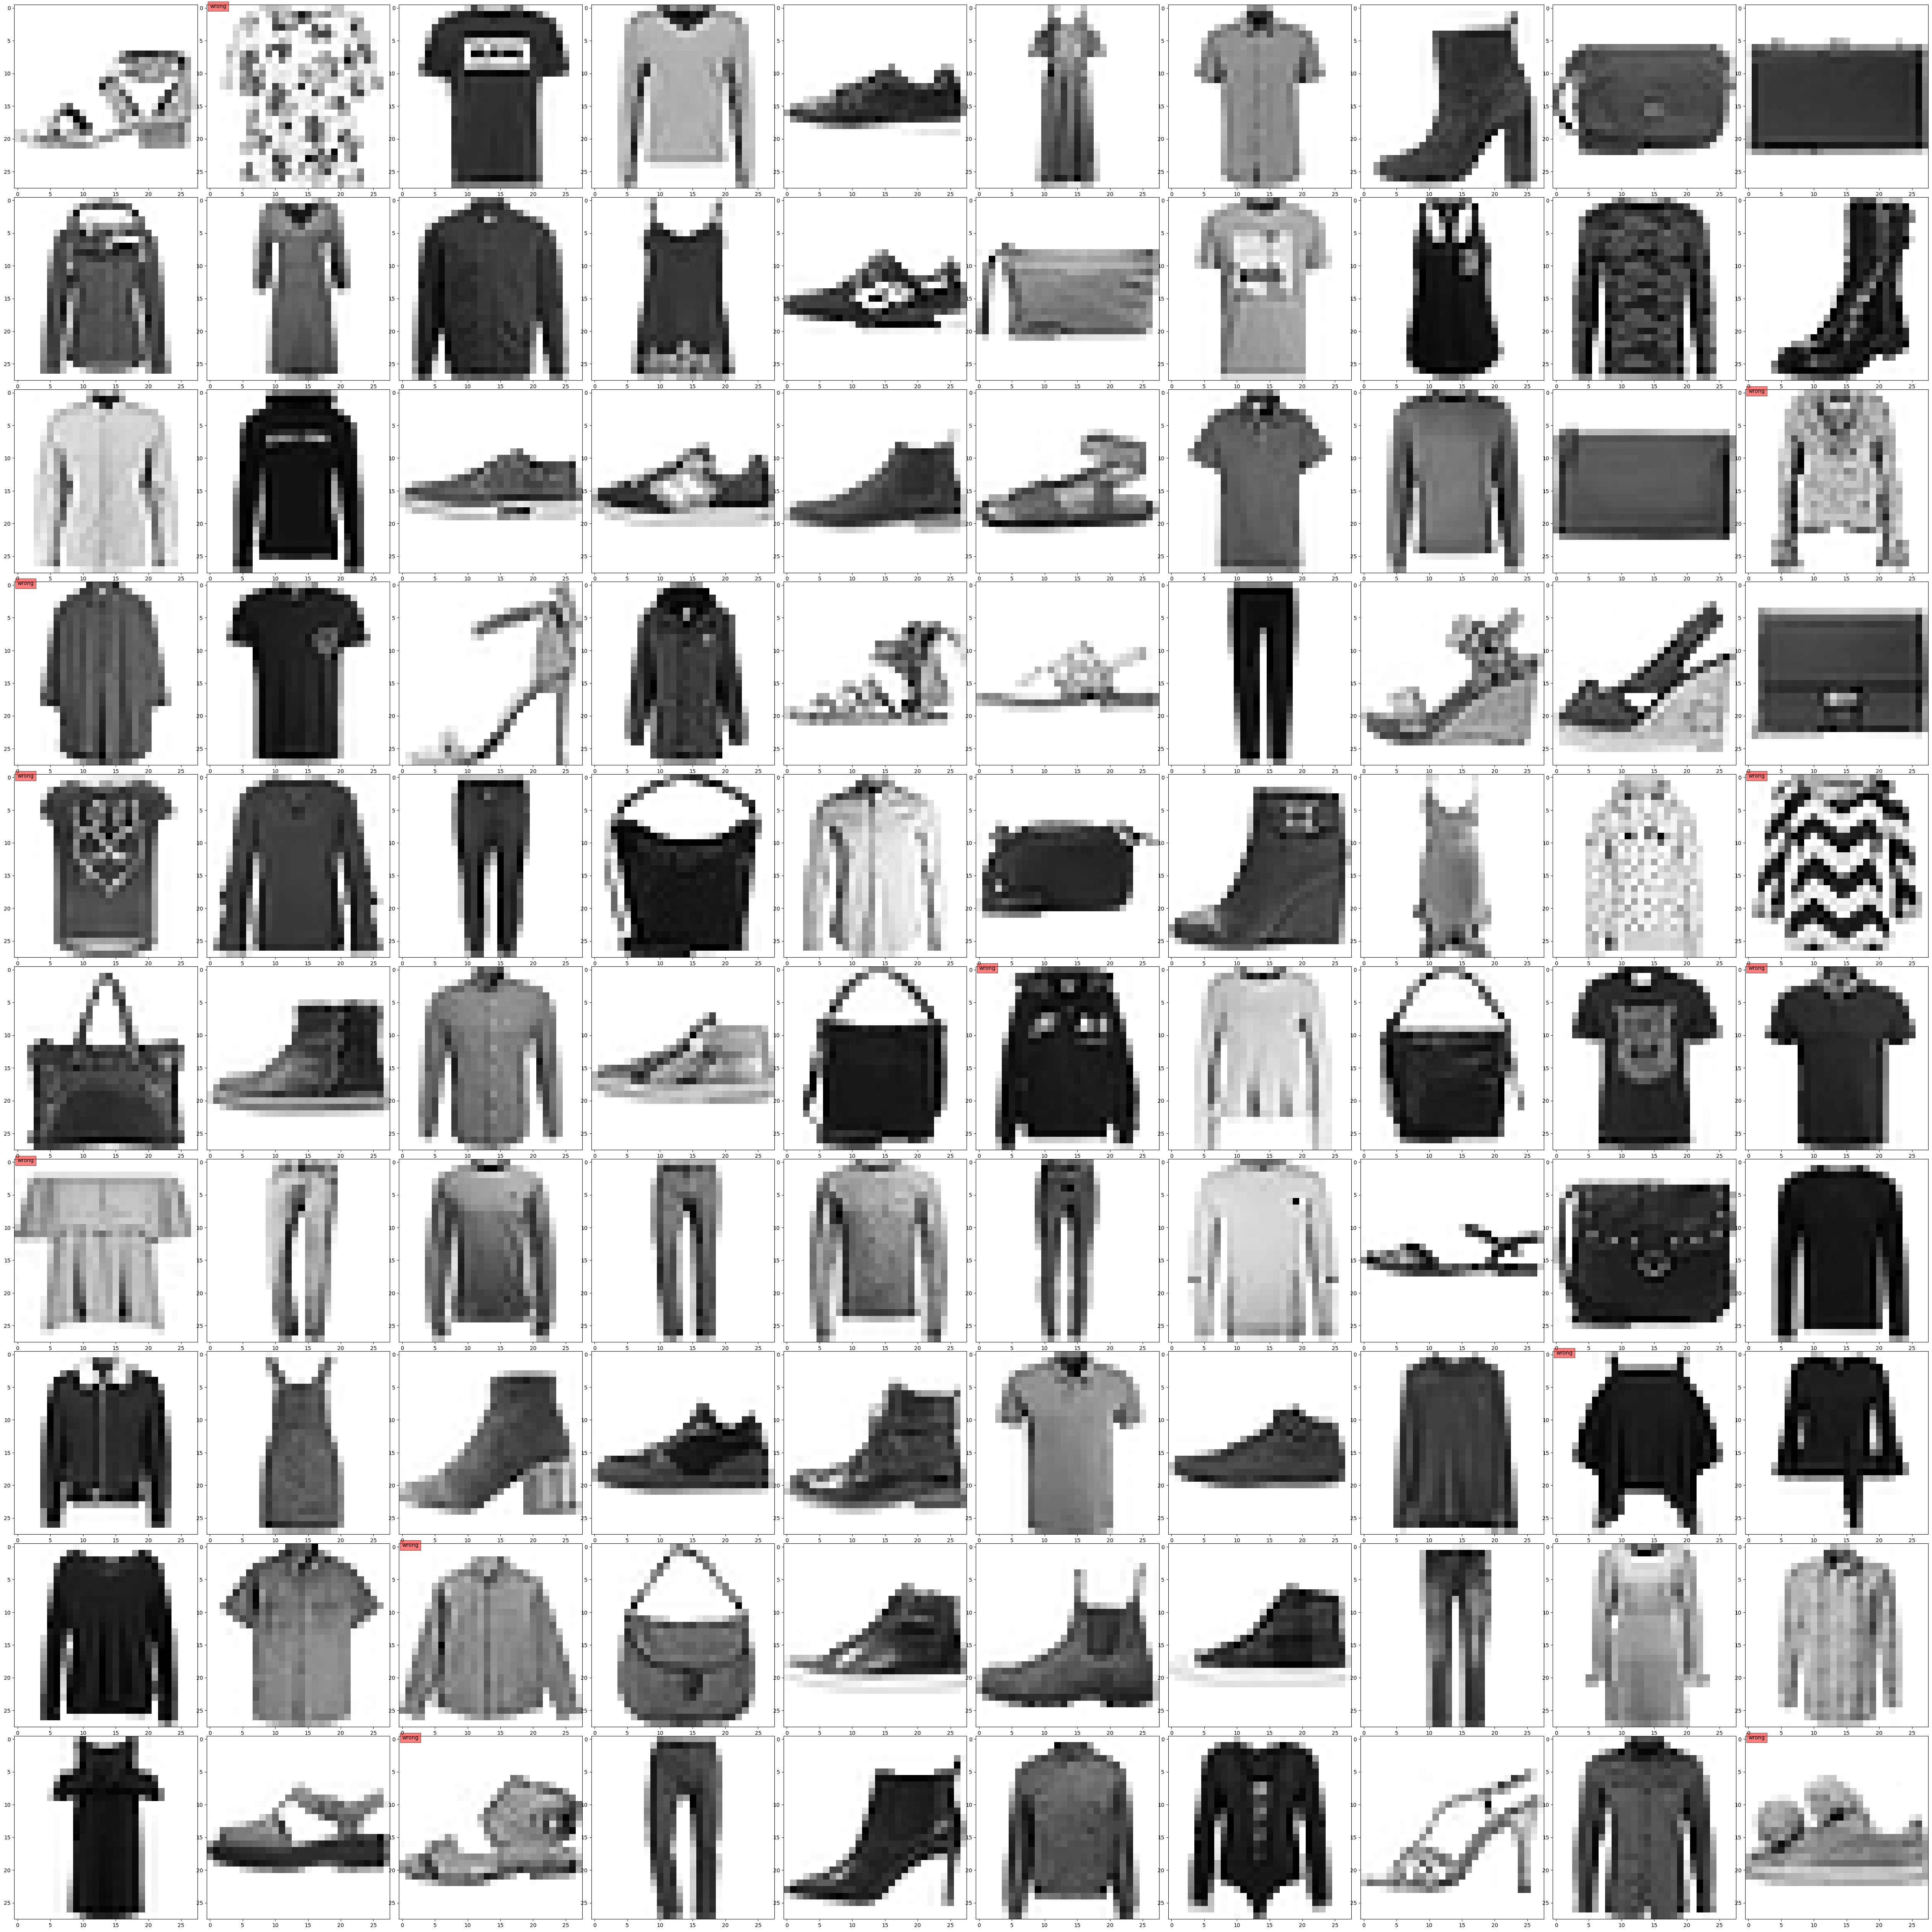

In [19]:
from sklearn.metrics import accuracy_score
#predicted vs actual (n=100)
fig =plt.figure(figsize=(50,50))
fig.subplots_adjust(0,0, 1, 1, 0.05, 0.05)
temp=[]
for i in range(100):
    randint=rd.randint(0,len(test_data))
    ax=fig.add_subplot(10, 10, i+1)
    ax.imshow(test_data[randint], cmap="binary")
    if test_label[randint]!=Predicted[randint].argmax():
        ax.text(0,0, "wrong", bbox=dict(facecolor='red', alpha=0.5))
    temp.append(randint)
    
print(accuracy_score(test_label[temp], [Predicted[i].argmax() for i in temp] ))